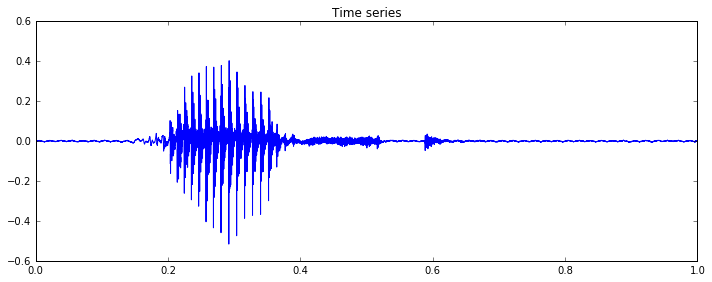

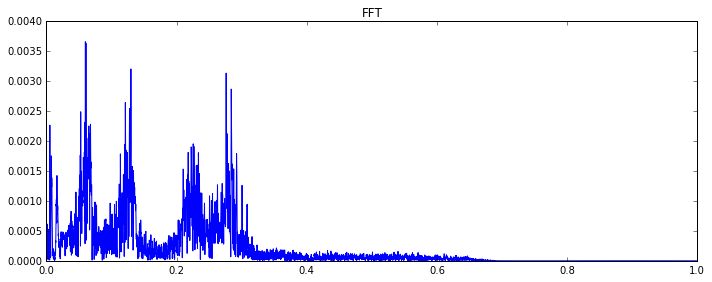

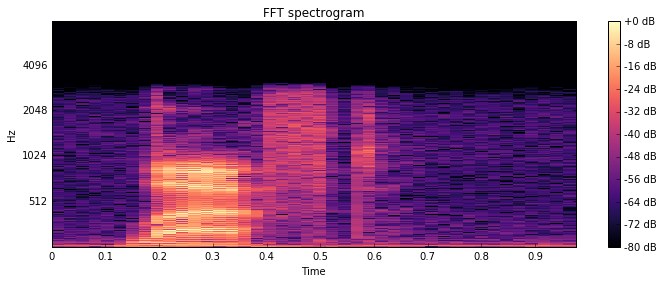

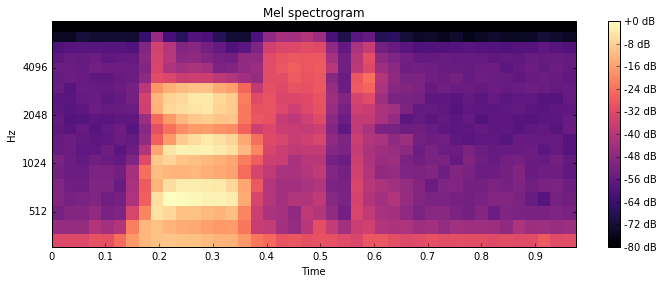

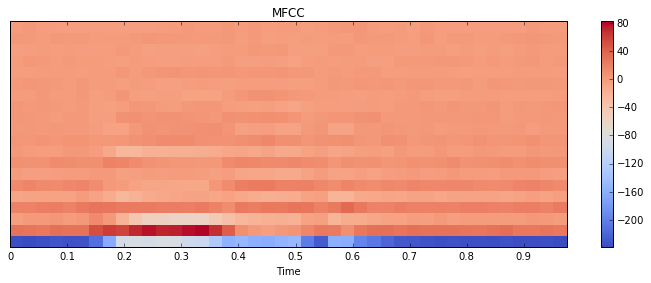

In [4]:
%matplotlib inline

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack


y, sr = librosa.load('../assets/spoken_command_example.wav')
# y, sr = librosa.load('../../audio-recognition/speech_commands_v0.01/no/fffcabd1_nohash_0.wav')
duration = len(y) / sr

# Plot the time series.
plt.figure(figsize=(10, 4))
plt.title('Time series')
t = [float(i)/sr for i, _ in enumerate(y)]
plt.plot(t, y)
plt.tight_layout()

# Plot the fft from scipy.
yf = scipy.fftpack.fft(y)
N = len(yf)
xf = np.linspace(0.0, duration, N/2)
plt.figure(figsize=(10, 4))
plt.title('FFT')
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.tight_layout()

D = np.abs(librosa.stft(y, n_fft=1024, hop_length=512, center=False))**2

# Show regular spectrogram.
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(D, ref=np.max),
                         y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('FFT spectrogram')
plt.tight_layout()


# Show Mel spectrogram.
S = librosa.feature.melspectrogram(S=D, n_mels=20)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                         y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

# Show MFCC spectrogram.
mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S))
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

# Save the spectrogram as an image.
import scipy.misc
scipy.misc.imsave('spec-librosa.png', mfccs)
